<a href="https://colab.research.google.com/github/bbevan/Colabs/blob/master/K_Means_Speciation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Speciation in Iris Flowers through K-Means Clustering

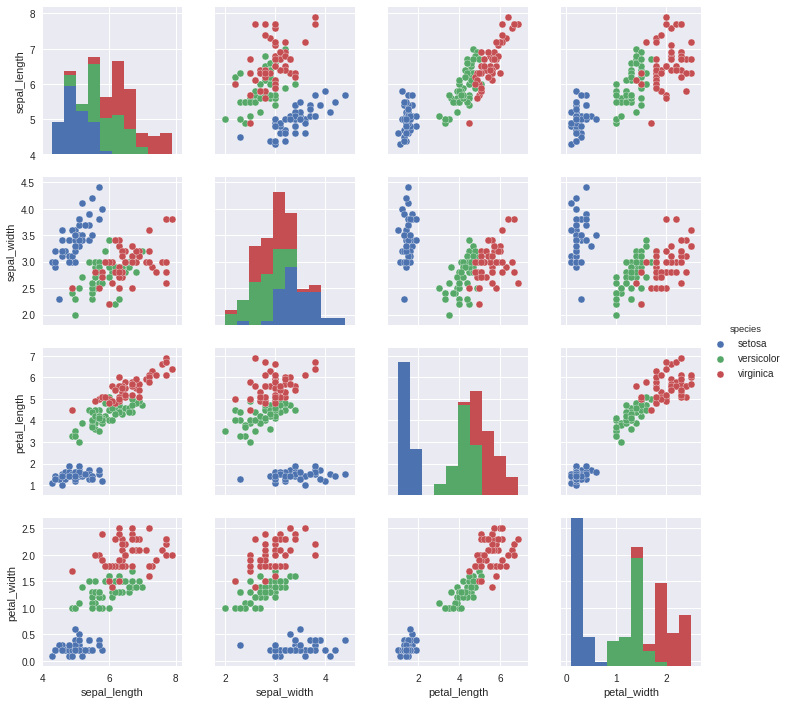

In [1]:
# load up requirements
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# load data
iris = sns.load_dataset('iris')
g = sns.pairplot(iris, hue='species')

# K-Means Speciation
We want to know if K-Means can determine the species of flower without prior knowledge. (Unsupervised Learning)

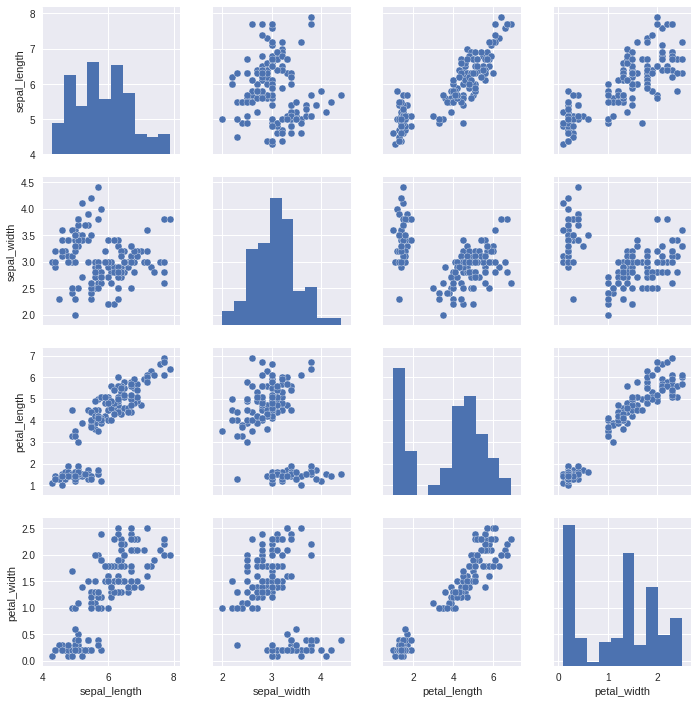

In [2]:
data = pd.DataFrame()
data = pd.DataFrame.copy(iris)


sns.pairplot(data)


# Lets try K-Means on the whole set

In [0]:
# Test/Train split
from sklearn.model_selection import train_test_split

my_data = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Normalize data
from sklearn import preprocessing

def norm(data):
  min_max_scaler = preprocessing.MinMaxScaler()
  norm_data = min_max_scaler.fit_transform(data)
  df_normalized = pd.DataFrame(norm_data)
  return df_normalized

my_data = norm(my_data)

# For future compat
testing_data = my_data


In [5]:
# Code Ripped from TensorFlow docs. Hacked for correctness.


def input_fn():
  return tf.train.limit_epochs(
      tf.convert_to_tensor(tf.cast(testing_data, tf.float32)), num_epochs=1)

num_clusters = 3
kmeans = tf.contrib.factorization.KMeansClustering(
    num_clusters=num_clusters, use_mini_batch=False)

# train
num_iterations = 10
previous_centers = None
for _ in range(num_iterations):
  kmeans.train(input_fn)
  cluster_centers = kmeans.cluster_centers()
  if previous_centers is not None:
    print('delta:', cluster_centers - previous_centers)
  previous_centers = cluster_centers
  print('score:', kmeans.score(input_fn))
print('cluster centers:', cluster_centers)

# map the input points to their clusters
cluster_indices = list(kmeans.predict_cluster_index(input_fn))
for i, point in enumerate(testing_data):
  cluster_index = cluster_indices[i]
  center = cluster_centers[cluster_index]
  print('point:', point, 'is in cluster', cluster_index, 'centered at', center)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp1i3le7b2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fe361add390>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.from_tensors(tensor).repeat(num_

In [6]:
#debugging
type(tf.float64)

tf.convert_to_tensor(tf.cast(testing_data, tf.float32))



<tf.Tensor 'Cast:0' shape=(150, 4) dtype=float32>

# Plot Species Clusters

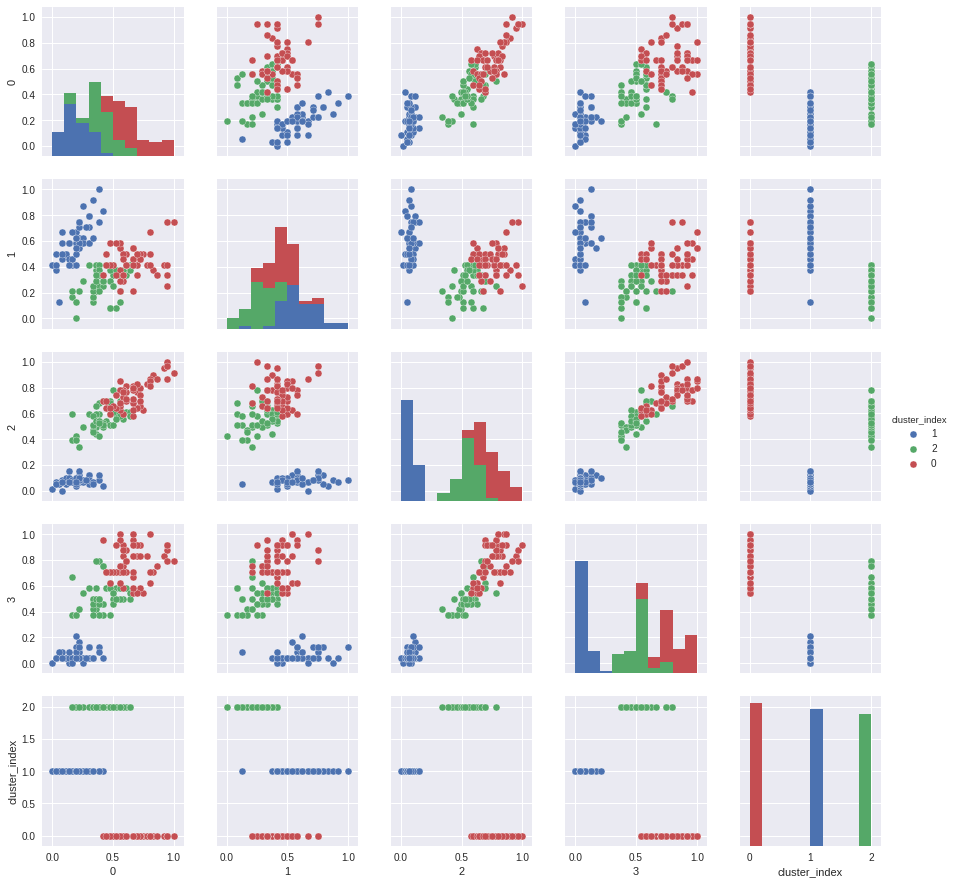

In [118]:
# Plot Species Clusters

testing_data['cluster_index'] = cluster_indices

sns.pairplot(testing_data, hue="cluster_index", hue_order=[1,2,0])

In [32]:
# Custom Evaluation

# 0 -> Virginica , 1 -> Setosa, 2 -> Versicolor

# Extract cluster_index column
clus = testing_data['cluster_index']
#print(clus.head())

# Replace cluster index with species
clus = clus.replace([0,1,2], ['virginica', 'setosa', 'versicolor'])
#print(clus.head())

# Extract species from original set
species = iris['species']
#print(species.head())

# Compare
my_bools = species == clus
err = sum(my_bools == False)

print("K-Means clustering incorrectly labeled " + str(err) + " out of " + str(len(clus)) + " flowers as the wrong species.\n")
print("Success rate: " + str(100-err/len(clus) * 100) + "%")


K-Means clustering incorrectly labeled 18 out of 150 flowers as the wrong species.

Success rate: 88.0%


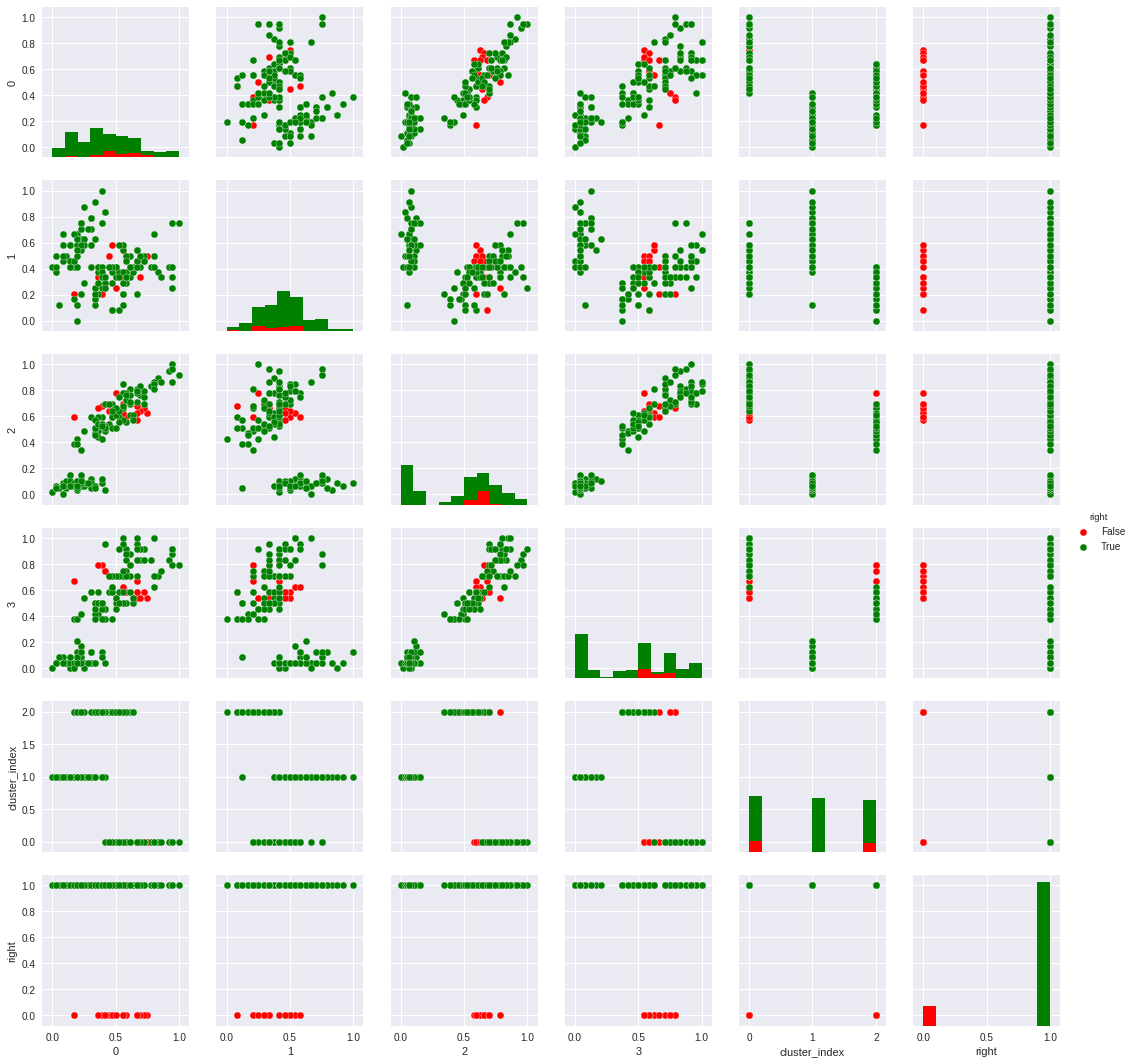

In [117]:
# More visualization
import itertools

final = pd.DataFrame.copy(testing_data)


final['species'] = clus
final['right'] = my_bools


sns.pairplot(final, hue="right", palette=["red", "green"])

  
 